In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import joblib
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_validate
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv("s3://germancredit2/datos/train/train.csv")
test = pd.read_csv("s3://germancredit2/datos/train/test.csv")

In [3]:
numeric_pipeline = Pipeline(
    [
     ('Imputacion con la media', SimpleImputer(strategy = 'mean')),
     ('Escalado minmax',MinMaxScaler())
        
    ]
)

In [4]:

#Sex, Purpose,Categoric_python,Checking account
categorical_pipeline = Pipeline(
    [
     ('Imputacion con la moda', SimpleImputer(strategy = 'most_frequent')),
     ('Codificacion',OneHotEncoder(sparse = False,drop='first'))
        
    ]
)

In [5]:
column_transformer = ColumnTransformer(
[
    ("numeric pipeline",numeric_pipeline,[0,1,2]),
    ("categorical pipeline",categorical_pipeline,[3,4,5])
]
)

In [6]:
features = ["Age","Credit amount","Duration","Sex","Purpose","Housing"]

### Selección de caracteristicas

In [7]:
#train = train.dropna()

In [8]:
X_train = train.drop(["Risk","Unnamed: 0"],axis=1)
y_train = train["Risk"]
y_train_transform = (y_train=='good').astype('int')


In [9]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               700 non-null    int64 
 1   Sex               700 non-null    object
 2   Job               700 non-null    int64 
 3   Housing           700 non-null    object
 4   Saving accounts   575 non-null    object
 5   Checking account  426 non-null    object
 6   Credit amount     700 non-null    int64 
 7   Duration          700 non-null    int64 
 8   Purpose           700 non-null    object
dtypes: int64(4), object(5)
memory usage: 49.3+ KB


In [10]:
y_train.size

700

In [11]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               700 non-null    int64 
 1   Sex               700 non-null    object
 2   Job               700 non-null    int64 
 3   Housing           700 non-null    object
 4   Saving accounts   575 non-null    object
 5   Checking account  426 non-null    object
 6   Credit amount     700 non-null    int64 
 7   Duration          700 non-null    int64 
 8   Purpose           700 non-null    object
dtypes: int64(4), object(5)
memory usage: 49.3+ KB


In [12]:
X_train = pd.get_dummies(X_train)

In [13]:
X_train

,Age,Job,Credit amount,Duration,Sex_female,Sex_male,Housing_free,Housing_own,Housing_rent,Saving accounts_little,...,Checking account_moderate,Checking account_rich,Purpose_business,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others
0,31,2,4473,36,0,1,0,1,0,1,...,0,1,0,0,0,0,0,1,0,0
1,46,2,1829,15,0,1,0,1,0,1,...,0,0,0,0,0,0,0,1,0,0
2,27,1,7418,60,0,1,0,1,0,0,...,1,0,0,0,0,0,0,1,0,0
3,27,2,1185,12,1,0,0,1,0,1,...,0,0,1,0,0,0,0,0,0,0
4,27,2,1237,6,1,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,41,1,5954,42,1,0,0,1,0,1,...,1,0,1,0,0,0,0,0,0,0
696,28,2,1887,18,0,1,0,1,0,0,...,1,0,1,0,0,0,0,0,0,0
697,63,1,1655,12,0,1,0,1,0,1,...,0,0,0,0,0,0,0,1,0,0
698,49,1,2096,12,0,1,0,1,0,1,...,0,0,0,0,0,1,0,0,0,0


In [14]:
model = DecisionTreeClassifier()

In [15]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [16]:
model.feature_importances_

array([0.13773673, 0.02497243, 0.29138746, 0.16281646, 0.02278912,
       0.01433319, 0.01641795, 0.0145695 , 0.02086168, 0.03858553,
       0.00510204, 0.00757847, 0.        , 0.06747871, 0.04923547,
       0.00354502, 0.01761003, 0.00612245, 0.        , 0.01526601,
       0.03417373, 0.04627427, 0.00314375, 0.        ])

In [17]:
X_train.columns

Index(['Age', 'Job', 'Credit amount', 'Duration', 'Sex_female', 'Sex_male',
       'Housing_free', 'Housing_own', 'Housing_rent', 'Saving accounts_little',
       'Saving accounts_moderate', 'Saving accounts_quite rich',
       'Saving accounts_rich', 'Checking account_little',
       'Checking account_moderate', 'Checking account_rich',
       'Purpose_business', 'Purpose_car', 'Purpose_domestic appliances',
       'Purpose_education', 'Purpose_furniture/equipment', 'Purpose_radio/TV',
       'Purpose_repairs', 'Purpose_vacation/others'],
      dtype='object')

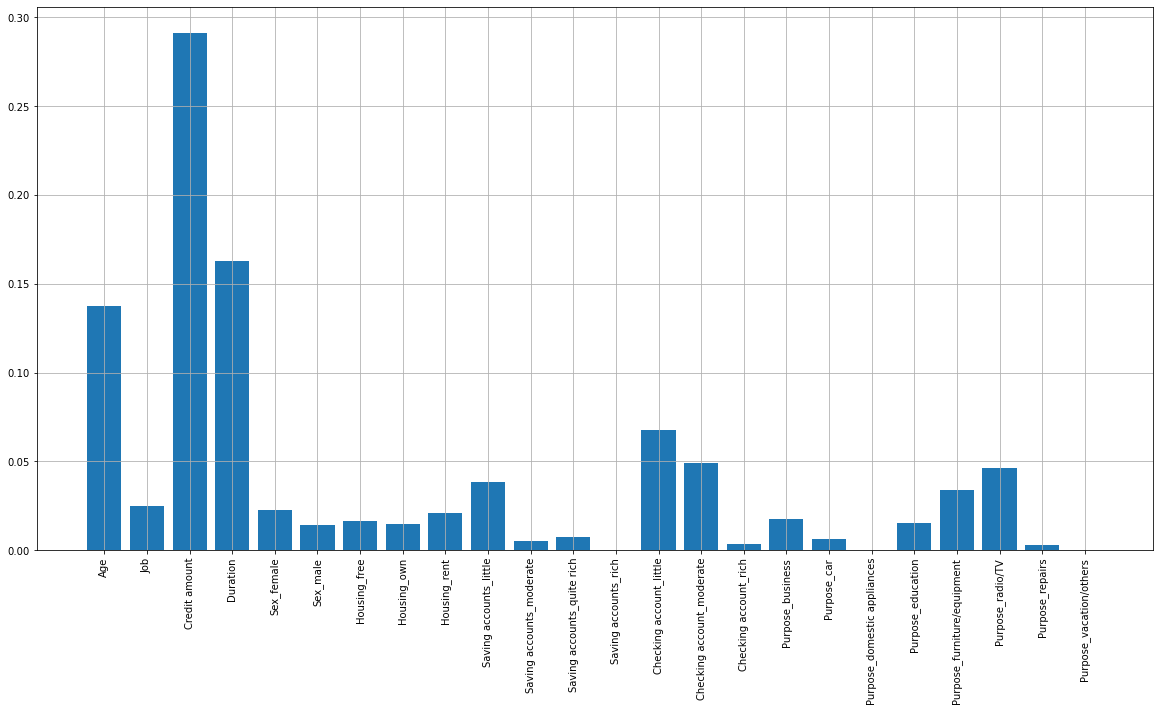

In [18]:
plt.figure(figsize = (20,10))
plt.bar(x=X_train.columns,height=model.feature_importances_)
plt.xticks(rotation=90)
plt.grid()
plt.show()

In [19]:
np.argsort(model.feature_importances_)[::-1]

array([ 2,  3,  0, 13, 14, 21,  9, 20,  1,  4,  8, 16,  6, 19,  7,  5, 11,
       17, 10, 15, 22, 12, 18, 23])

In [20]:
order_columns = X_train.columns[np.argsort(model.feature_importances_)[::-1]]

In [21]:
order_importance = np.sort(model.feature_importances_)[::-1]

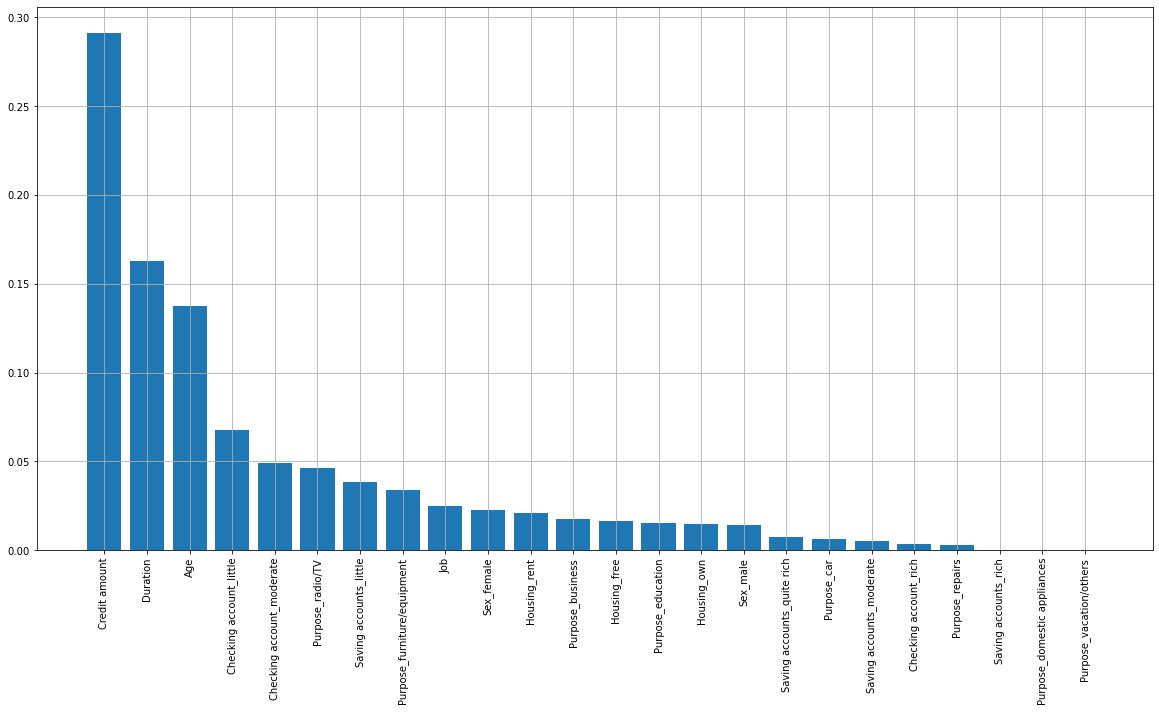

In [22]:
plt.figure(figsize = (20,10))
plt.bar(x=order_columns,height=order_importance)
plt.xticks(rotation=90)
plt.grid()
plt.show()

In [23]:
### IMPORTANCIA DE LAS CARACTERISTICAS 

In [24]:
### REGRESION LOGISTICA

In [25]:
from sklearn.linear_model import LogisticRegression

In [26]:
from sklearn.preprocessing import MinMaxScaler

In [27]:
X_train_scaled = MinMaxScaler().fit_transform(X_train)

In [28]:
model = LogisticRegression()

In [29]:
model.fit(X_train_scaled, y_train)

LogisticRegression()

In [30]:
model.coef_

array([[ 0.835423  ,  0.22589944, -0.84641275, -1.65275004, -0.17648599,
         0.17627164, -0.06978226,  0.19162547, -0.12205756, -0.75798873,
        -0.61445739, -0.0168324 ,  0.4072842 , -1.58304637, -1.21149862,
        -0.53892366, -0.02147902,  0.10660812,  0.06698805, -0.61955824,
         0.21115495,  0.55444807, -0.22076645, -0.07760984]])

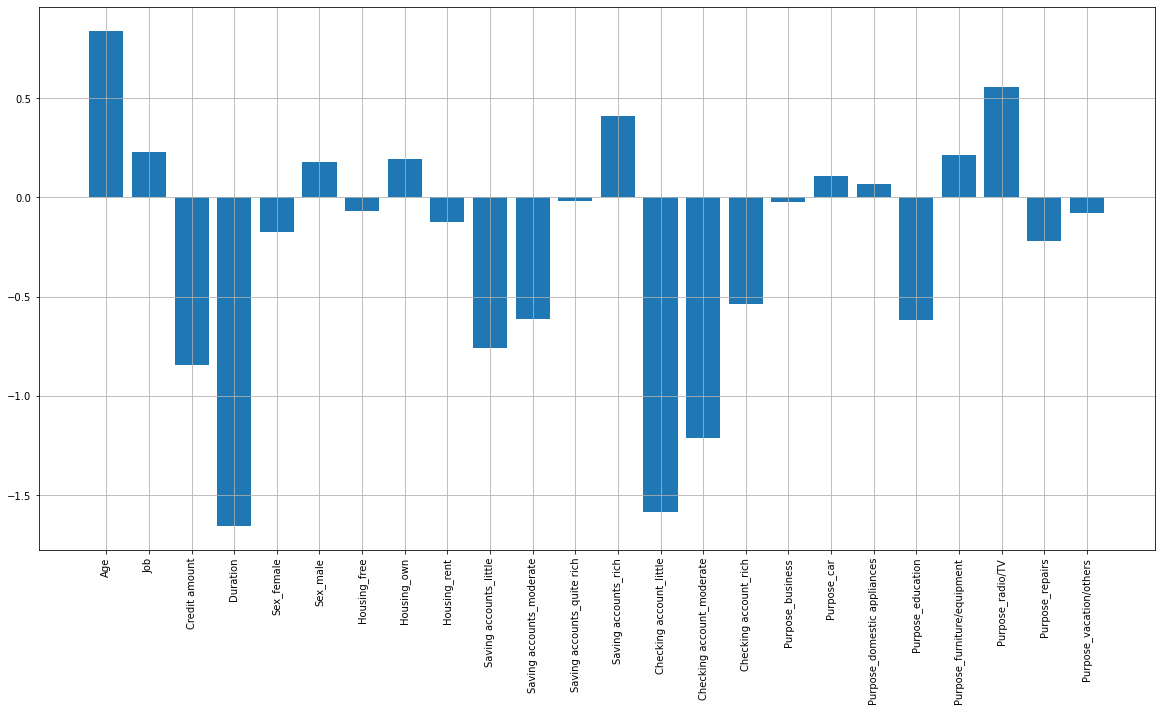

In [31]:
plt.figure(figsize = (20,10))
plt.bar(x=X_train.columns,height=model.coef_[0])
plt.xticks(rotation=90)
plt.grid()
plt.show()

In [32]:
### EVALUACION DE MODELOS

In [33]:
final_pipeline = Pipeline(
[
    ("preprocesameinto",column_transformer),
    ("modelo",DecisionTreeClassifier(max_depth=3))
])

In [34]:
X_train = train[features]

In [35]:
results = cross_validate(final_pipeline,X_train,y_train_transform,cv=10,
                         return_train_score=True,
                        scoring=["f1","accuracy"])

In [36]:
print(results["test_accuracy"].mean(),"+-",results["test_accuracy"].std())

0.7228571428571429 +- 0.014568627181693663


In [37]:
from sklearn.ensemble import RandomForestClassifier

In [38]:
final_pipeline = Pipeline(
[
    ("preprocesameinto",column_transformer),
    ("modelo",RandomForestClassifier(max_depth=3))
])

In [39]:
results = cross_validate(final_pipeline,X_train,y_train_transform,cv=10,
                         return_train_score=True,
                        scoring=["f1","accuracy"])

In [40]:
print(results["test_accuracy"].mean(),"+-",results["test_accuracy"].std())

0.7085714285714285 +- 0.01714285714285715


In [41]:
from sklearn.svm import SVC

In [42]:
final_pipeline = Pipeline(
[
    ("preprocesameinto",column_transformer),
    ("modelo",SVC())
])

In [43]:
results = cross_validate(final_pipeline,X_train,y_train_transform,cv=10,
                         return_train_score=True,
                        scoring=["f1","accuracy"])

In [44]:
print(results["test_accuracy"].mean(),"+-",results["test_accuracy"].std())

0.7071428571428571 +- 0.01720227796970329


In [45]:
############ AJUSTE DE HIPERPARAMETROS

In [46]:
from sklearn.model_selection import GridSearchCV

In [47]:
grid = {'max_depth':[2,3,5,10],
        'n_estimators':[50,100,200]}

In [48]:
grid_search = GridSearchCV(
RandomForestClassifier(),    
param_grid=grid,
cv=10,
scoring="accuracy")

In [49]:
column_transformer.fit(train[["Age","Credit amount","Duration","Sex","Purpose","Housing",]])

ColumnTransformer(transformers=[('numeric pipeline',
                                 Pipeline(steps=[('Imputacion con la media',
                                                  SimpleImputer()),
                                                 ('Escalado minmax',
                                                  MinMaxScaler())]),
                                 [0, 1, 2]),
                                ('categorical pipeline',
                                 Pipeline(steps=[('Imputacion con la moda',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('Codificacion',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False))]),
                                 [3, 4, 5])])

In [50]:
X_train_processed = column_transformer.transform(X_train)

In [51]:
grid_search.fit(X_train_processed,y_train_transform)

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [2, 3, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [52]:
grid_search.best_params_

{'max_depth': 5, 'n_estimators': 50}

In [53]:
grid_search.best_score_

0.7157142857142857

In [54]:
final_pipeline = Pipeline(
[
    ("preprocesameinto",column_transformer),
    ("modelo",RandomForestClassifier(max_depth=3,n_estimators = 200))
])

In [55]:
final_pipeline.fit(X_train,y_train)

Pipeline(steps=[('preprocesameinto',
                 ColumnTransformer(transformers=[('numeric pipeline',
                                                  Pipeline(steps=[('Imputacion '
                                                                   'con la '
                                                                   'media',
                                                                   SimpleImputer()),
                                                                  ('Escalado '
                                                                   'minmax',
                                                                   MinMaxScaler())]),
                                                  [0, 1, 2]),
                                                 ('categorical pipeline',
                                                  Pipeline(steps=[('Imputacion '
                                                                   'con la '
                                      

In [56]:
joblib.dump(final_pipeline,'modelrf.joblib')

['modelrf.joblib']